In [1]:
%matplotlib widget
from matplotlib import pyplot as plt

import pybullet as p
import numpy as np
import pybullet_data
import IPython.display
import PIL.Image
from utilities.render_utils import compiler_video, image_renderer
from utilities.pyb_vizutils import pyb_viz
from utilities.pyb_bodyutils import create_side_sliders, deactivate_joint_motors

In [2]:
p.connect(p.DIRECT)
p.resetSimulation()
p.setAdditionalSearchPath(pybullet_data.getDataPath())
pybullet_data.getDataPath()

'/home/ehsans2/.local/lib/python3.6/site-packages/pybullet_data'

In [3]:
time_step = 0.0001
def reset_sim():
    global plane, robot, viz_util
    p.resetSimulation()
    plane = p.loadURDF("plane.urdf", useFixedBase=True)
    robot_urdf = 'urdf/mymonoped_handed.urdf'
    robot = p.loadURDF(robot_urdf, basePosition = [0, 0, 1.3], baseOrientation = [0,0,1,1],
                       useFixedBase=False)
    thickness = 0.04
    slide_height = 5
    create_side_sliders(slide_height = slide_height, slide_width = 0.06, wall_thickness = thickness, 
                        centerPosition = [-(1.27-thickness/2),0,slide_height/2+thickness], left_wall = True)
    create_side_sliders(slide_height = slide_height, slide_width = 0.06, wall_thickness = thickness, 
                        centerPosition = [ (1.27-thickness/2),0,slide_height/2+thickness], right_wall = True)
    p.setGravity(0, 0, -9.81)
    p.setTimeStep(time_step)
    p.setRealTimeSimulation(0)
    viz_util = pyb_viz()
    deactivate_joint_motors(robot)

reset_sim()

In [4]:
vid_compiler = compiler_video()
disp_np_im = lambda np_im: IPython.display.display(PIL.Image.fromarray(np_im.astype(np.uint8)))
im_renderer_h = image_renderer(pixelWidth=640, pixelHeight=480)
im_renderer_v = image_renderer(pixelWidth=640, pixelHeight=480)
im_renderer_h.set_view(yaw = 90, #yaw angle in degrees left/right around up-axis
                       pitch = -20, #pitch in degrees up/down
                       roll = 0) #roll in degrees around forward vector
im_renderer_v.set_view(yaw = 0, pitch=-20, roll=0)

#plt.imshow(im_renderer())

uint8


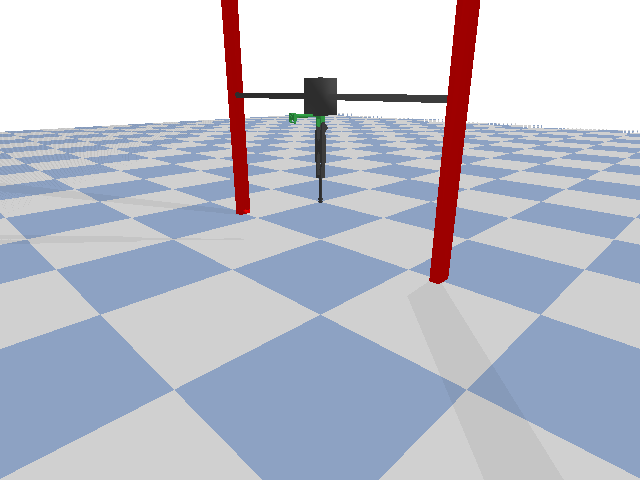

In [5]:
viz_util.unhide_all()
#viz_util.hide_like_before()
im_renderer_v.set_view(yaw = 45)
disp_np_im(im_renderer_v())

In [ ]:
T = 2
theta = 0.3
fps = 20
maxforce = 0

reset_sim()
p.resetBaseVelocity(plane,linearVelocity=[0,2,0])
im_renderer_v.set_view(yaw = 0)
disp_np_im(im_renderer_v())

vid_compiler = compiler_video()
vid_compiler.reset()
im_renderer_h.set_view(yaw = 90)
im_renderer_v.set_view(yaw = 0)
last_render_t = 0
yaw = 0
for t in np.arange(10/time_step)*time_step:
    desired_angle = (theta*4./T) * (np.abs(((t - T/4.)%T)-T/2)-T/4)
    
    desired_angle = theta * np.sin(t*(2*np.pi)/T)
    if False:
        p.setJointMotorControl2(bodyUniqueId=robot, 
                                jointIndex=2, 
                                controlMode=p.POSITION_CONTROL,
                                targetPosition = desired_angle*0.9,
                                force = maxforce)

        p.setJointMotorControl2(bodyUniqueId=robot, 
                                jointIndex=3, 
                                controlMode=p.POSITION_CONTROL,
                                targetPosition = -2 * desired_angle,
                                force = maxforce)

    p.stepSimulation()
    
    if t - last_render_t > (1./fps):
        np_img_arr_h = im_renderer_h()
        np_img_arr_v = im_renderer_v()
        border = np.zeros((np_img_arr_h.shape[0], 10, 4))
        np_img_arr = np.concatenate([np_img_arr_v, border, np_img_arr_h], axis=1)
        vid_compiler.add_np_img(np_img_arr)
        last_render_t = t
vid_compiler(out_file='output/hoppertestvideos/bouncing.mp4', fps=20)
print('done!')

In [ ]:
T = 2
theta = 1
fps = 20
maxforce = 10

vid_compiler.reset()
last_render_t = 0
for t in np.arange(10/time_step)*time_step:
    desired_angle = (theta*4./T) * (np.abs(((t - T/4.)%T)-T/2)-T/4)
    p.setJointMotorControl2(bodyUniqueId=robot, 
                            jointIndex=2, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition = desired_angle,
                            force = maxforce)

    p.stepSimulation()
    
    if t - last_render_t > (1./fps):
        np_img_arr = im_renderer_v()
        vid_compiler.add_np_img(np_img_arr)
        last_render_t = t
vid_compiler(out_file='output/hoppertestvideos/swinging.mp4', fps=20)
print('done!')

In [ ]:
p.getJointInfo(robot, 1)[2] == p.JOINT_FIXED

In [ ]:
for i in range(p.getNumJoints(robot)):
    print(p.getJointInfo(robot, i))

In [ ]:
np.array([list(x)[:2] for x in p.getJointStates(robot, [0,1])]).reshape(-1).tolist()